Time-Series Analysis & Forecasting

WE WANT TO SPOT THE TREND PER WEEKLY OVERALL SALE

In [1]:
import pandas as pd

df = pd.read_csv('CLEANED_FMCG_2022_2024.csv')
print(df.head(10))

         date     sku     brand    segment category     channel      region  \
0  2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk      Retail  PL-Central   
1  2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk      Retail    PL-North   
2  2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk      Retail    PL-South   
3  2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk    Discount  PL-Central   
4  2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk    Discount    PL-North   
5  2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk    Discount    PL-South   
6  2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk  E-commerce    PL-North   
7  2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk  E-commerce    PL-South   
8  2022-01-22  MI-006  MiBrand1  Milk-Seg3     Milk      Retail  PL-Central   
9  2022-01-22  MI-006  MiBrand1  Milk-Seg3     Milk      Retail    PL-North   

   pack_type  price_unit  promotion_flag  delivery_days  stock_available  \
0  Multipack        2.38               0              

In [ ]:
# assuming your cleaned data is in df
# and your columns are "date" and "units_sold"

# make sure date is datetime
print(df['date'].dtype)


object


In [8]:
#RE CONVERT TO DATETIME 
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# Regroup by week and sum sales
# weekly_sales = df.groupby(pd.Grouper(key='date', freq='W'))[
#     'units_sold'].sum().reset_index()

In [ ]:
# Fill missing weeks with 0 (so graph captures all)
# all_weeks = pd.date_range(start=weekly_sales['date'].min(),
#                           end=weekly_sales['date'].max(),
#                           freq='W')
# weekly_sales = weekly_sales.set_index('date').reindex(
#     all_weeks, fill_value=0).reset_index()
# weekly_sales.columns = ['date', 'units_sold']

In [21]:
#group by week and sum

weekly_sales = df.resample('W-MON', on='date')['units_sold'].sum().reset_index().sort_values('date')
weekly_sales.head(20)

,date,units_sold
0,2022-01-24,599
1,2022-01-31,1496
2,2022-02-07,1368
3,2022-02-14,1415
4,2022-02-21,1439
5,2022-02-28,1425
6,2022-03-07,2605
7,2022-03-14,2895
8,2022-03-21,4058
9,2022-03-28,4307


In [19]:
#plotting the graph

import matplotlib.pyplot as plt

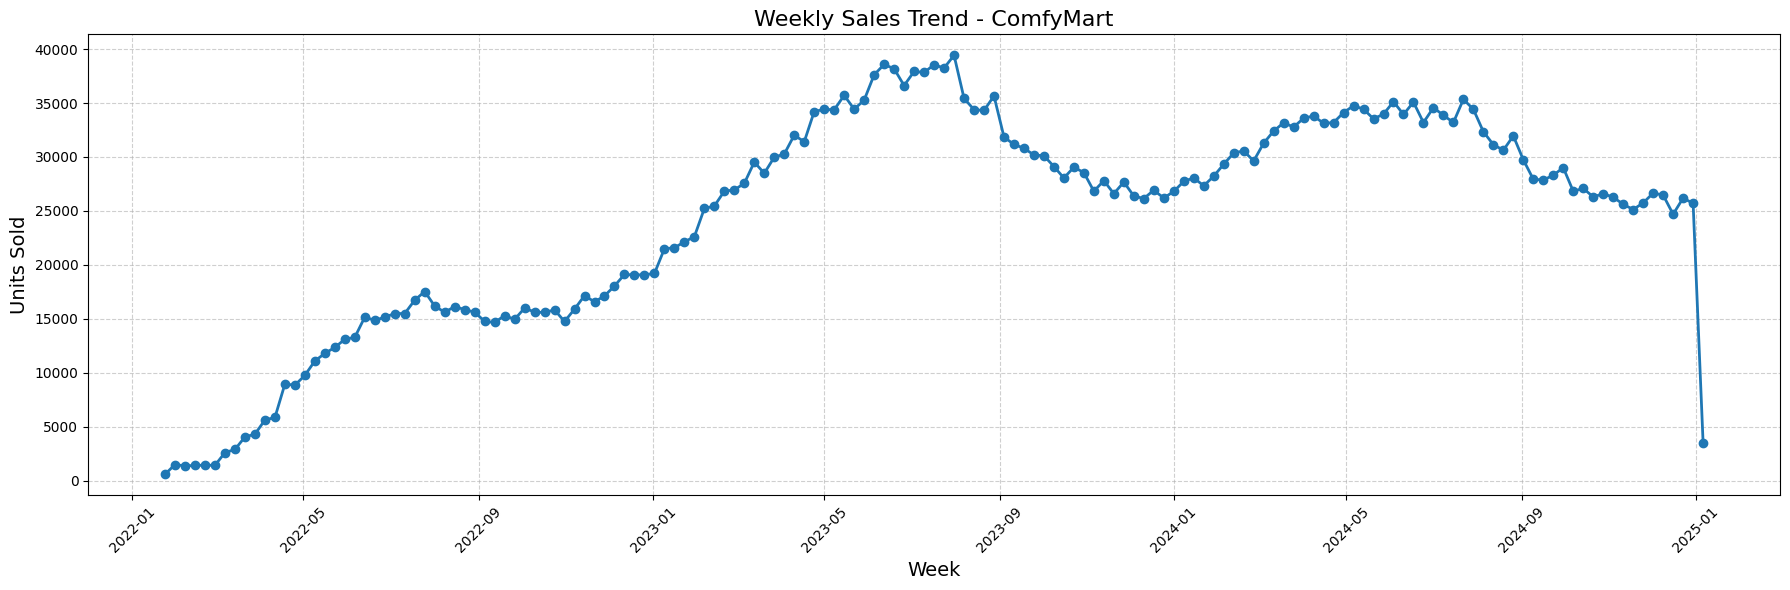

In [23]:
# plt.figure(figsize=(10, 5))
# plt.plot(weekly_sales['date'], marker='o', linewidth= 2)
# plt.title('Weekly Sales Trend - ComfyMart', fontsize= 14)
# plt.ylabel('Units Sold', fontsize=12)
# plt.xlabel('week', fontsize=12)
# plt.grid(True)
# plt.show()


plt.figure(figsize=(18, 6))  # wider graph to capture all weeks
plt.plot(weekly_sales['date'], weekly_sales['units_sold'],
         marker='o', linewidth=2)

plt.title("Weekly Sales Trend - ComfyMart", fontsize=16)
plt.xlabel("Week", fontsize=14)
plt.ylabel("Units Sold", fontsize=14)

plt.xticks(rotation=45)  # rotate dates so they don’t overlap
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

TO SMOOTHEN OUT THE NOISE, WE WILL BE USING ROLLING WINDOWS ALSO KNOWN AS MOVING AVERAGE. THIS WILL MAKE OUR GRAPH SHORTER BUST AT THE SAME TIME FILTERING OUT THE NOISE TO SHOW THE REAL TREND. FOR MY PROJECT, I WILL BE USING A 4 WEEK ROLLING MEAN

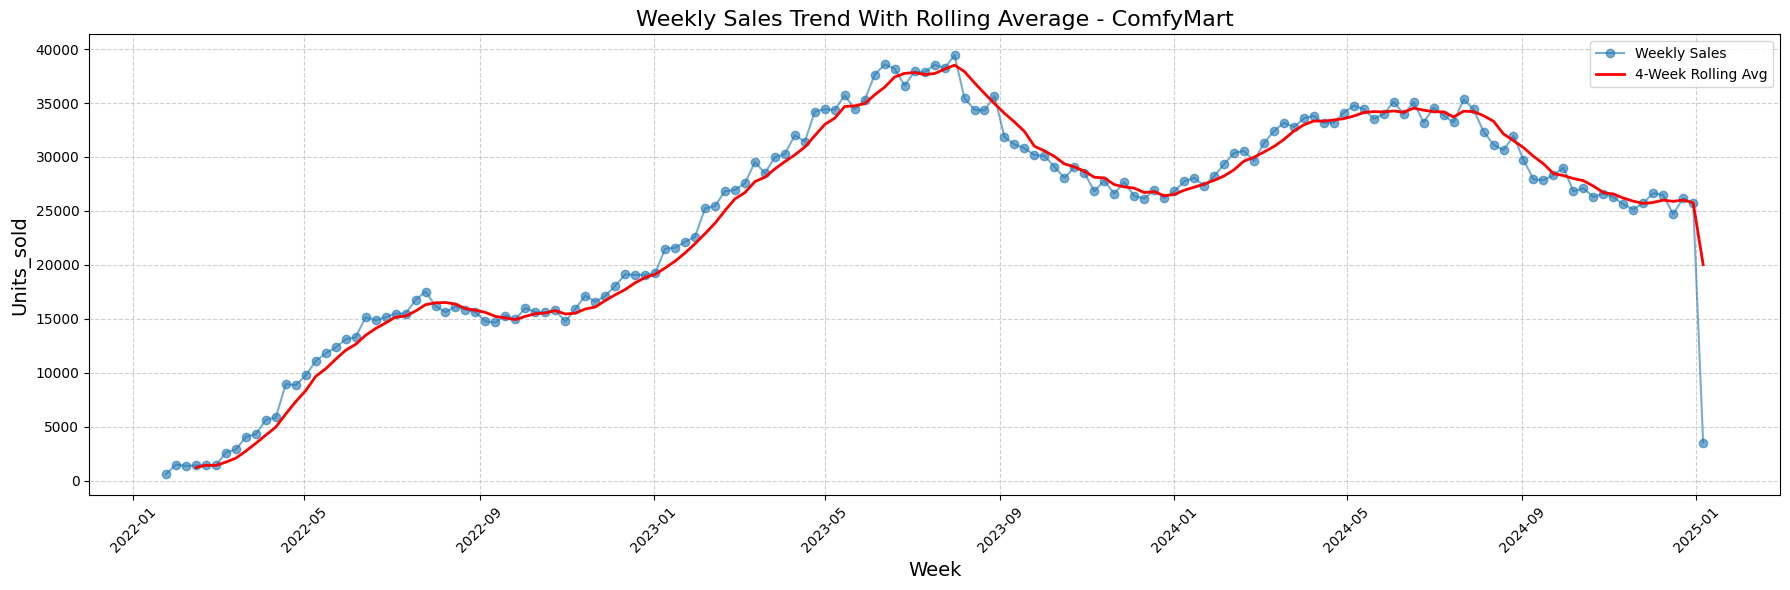

In [26]:
weekly_sales['rolling_avg'] = weekly_sales['units_sold'].rolling(window=4).mean()

plt.figure(figsize=(18,6))
plt.plot(weekly_sales['date'], weekly_sales['units_sold'], marker='o', label='Weekly Sales', alpha=0.6)
plt.plot(weekly_sales['date'], weekly_sales['rolling_avg'], color='red', linewidth=2, label='4-Week Rolling Avg')
 
plt.title('Weekly Sales Trend With Rolling Average - ComfyMart', fontsize=16)
plt.xlabel('Week', fontsize=14)
plt.ylabel('Units_sold', fontsize=14)
 
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()



Now, it's time for us to predict future forcast by using a tool called prophet

In [28]:
from prophet import Prophet

20:38:51 - cmdstanpy - INFO - Chain [1] start processing
20:38:51 - cmdstanpy - INFO - Chain [1] done processing


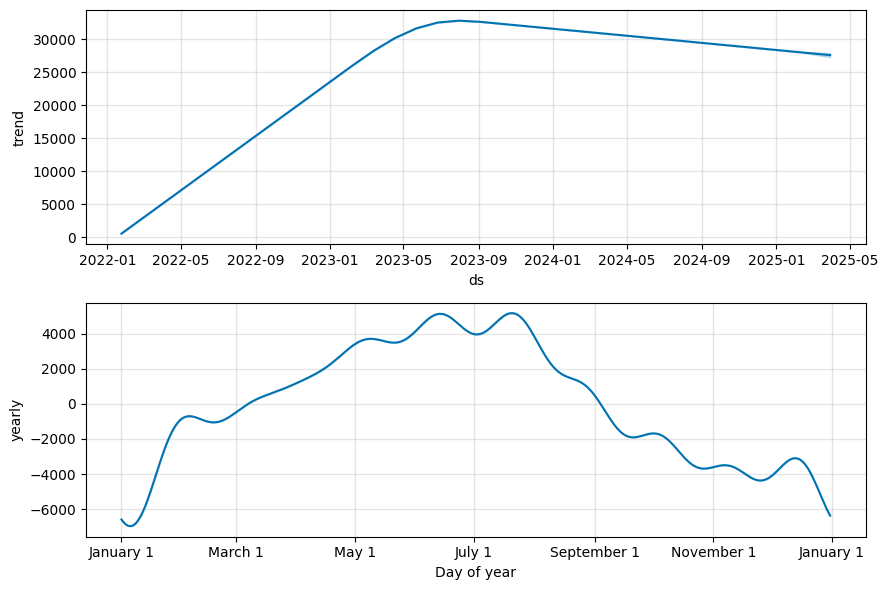

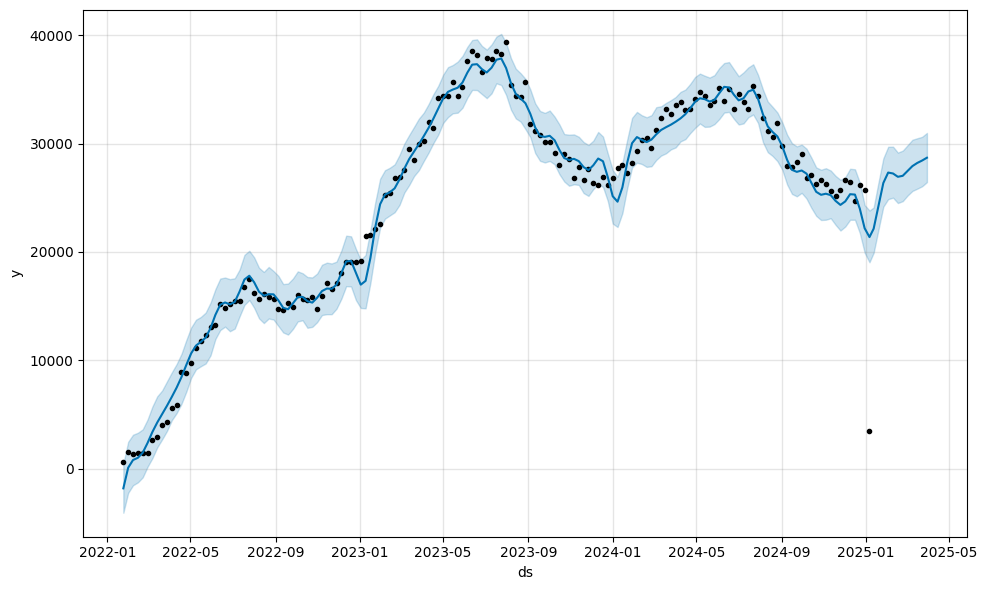

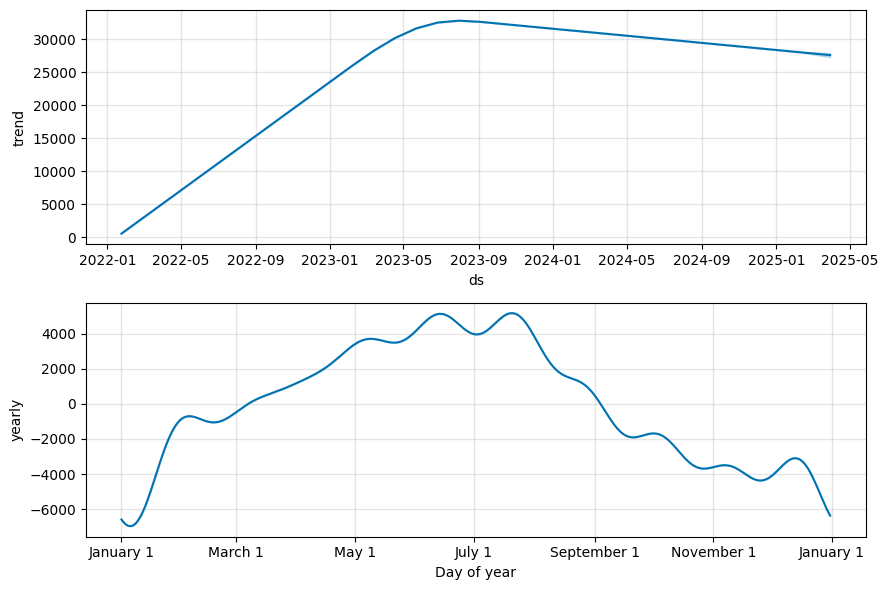

In [35]:
#Prepare data for Prophet

prophet_df = weekly_sales.reset_index()[['date', 'units_sold']]
prophet_df.rename(columns={'date': 'ds', 'units_sold': 'y'}, inplace=True)

#Intitialise and fit
model = Prophet()
model.fit(prophet_df)

#Forcast 12 Weeks ahead
future = model.make_future_dataframe(periods=12, freq='W')
forecast = model.predict(future)

#plot forcast
model.plot(forecast)
model.plot_components(forecast)
